# Naive Bayes on Iris Dataset.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [2]:
df=pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Data Visualization

<AxesSubplot:xlabel='sepal_length'>

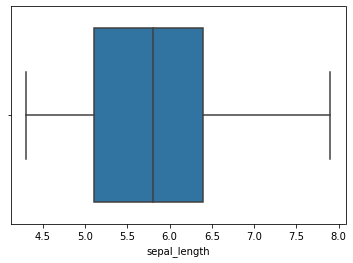

In [8]:
sns.boxplot(df['sepal_length'])

<AxesSubplot:xlabel='sepal_width'>

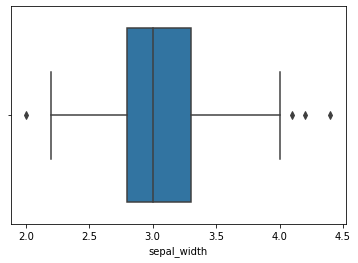

In [9]:
sns.boxplot(df['sepal_width'])

<AxesSubplot:xlabel='petal_length'>

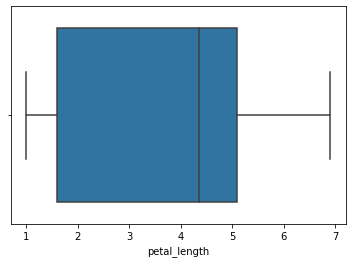

In [10]:
sns.boxplot(df['petal_length'])

<AxesSubplot:xlabel='petal_width'>

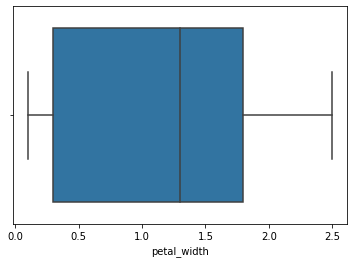

In [11]:
sns.boxplot(df['petal_width'])

In [12]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

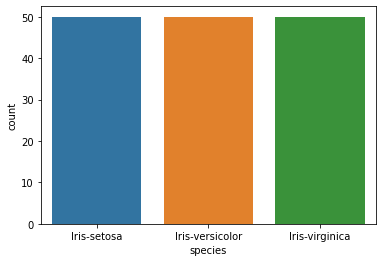

In [13]:
sns.countplot(df['species'])

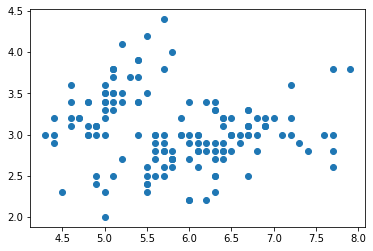

In [14]:
plt.scatter(df['sepal_length'],df['sepal_width'])

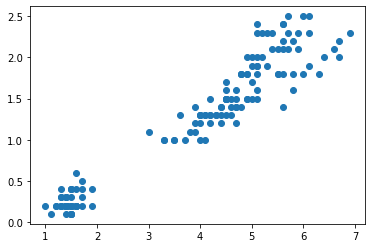

In [15]:
plt.scatter(df['petal_length'],df['petal_width'])

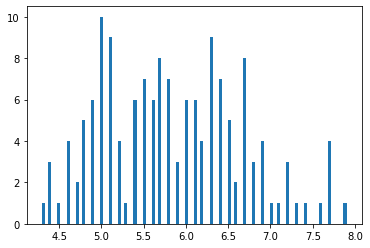

In [16]:
plt.hist(df['sepal_length'],bins=100)
plt.show()

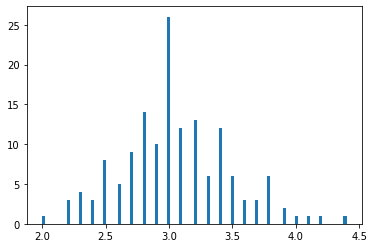

In [17]:
plt.hist(df['sepal_width'],bins=100)
plt.show()

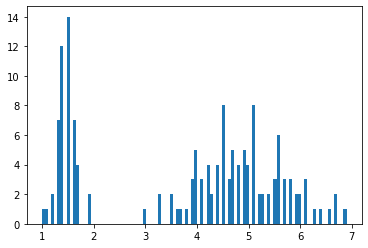

In [18]:
plt.hist(df['petal_length'],bins=100)
plt.show()

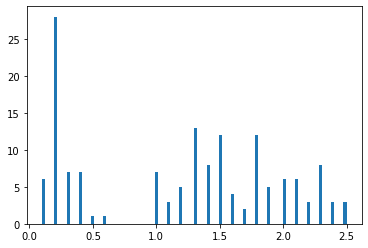

In [19]:
plt.hist(df['petal_width'],bins=100)
plt.show()

## Encoding the Data

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
df['species']=le.fit_transform(df['species'])

In [23]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int32
dtype: object

In [24]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [25]:
scale=ss.fit_transform(df.drop(columns=['species']))
scale

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [26]:
df_ss=pd.DataFrame(scale)
df_ss

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [27]:
df1=pd.concat([df_ss,df['species']],axis=1)
df1

,0,1,2,3,species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2
146,0.553333,-1.281972,0.705893,0.922064,2
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,2


In [28]:
x=df.drop(columns=['species'],axis=1)
y=df['species']

## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [30]:
x_train.shape

(120, 4)

In [31]:
y_train.shape

(120,)

In [32]:
x_test.shape

(30, 4)

In [33]:
y_test.shape

(30,)

# Fitting the model

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [36]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [37]:
y_train_pred=nb.predict(x_train)
y_test_pred=nb.predict(x_test)

## Model Evaluation

In [41]:
print("training accuracy",accuracy_score(y_train,y_train_pred))

training accuracy 0.95


In [42]:
print("Testing accuracy",accuracy_score(y_test,y_test_pred))

Testing accuracy 0.9666666666666667
